In [27]:
import pandas as pd
import networkx as nx
import requests

In [28]:
df = pd.read_csv('SFLow_data_sample.csv.csv', names=['Type', 'SFlowAgentAddr', 'InputPort', 'OutputPort', 'srcMAC', 'dstMAC', 'EthernetType', 'InVLAN', 'OutVLAN', 'SrcIP', 'DstIP', 'IPProtocol', 'IpTOS', 'IpTTL', 'UDPSrcPort', 'UDPDstPort', 'TCPFlags', 'PacketSize', 'IPSize', 'SamplingRate'], index_col=False)
df

,Type,SFlowAgentAddr,InputPort,OutputPort,srcMAC,dstMAC,EthernetType,InVLAN,OutVLAN,SrcIP,DstIP,IPProtocol,IpTOS,IpTTL,UDPSrcPort,UDPDstPort,TCPFlags,PacketSize,IPSize,SamplingRate
0,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
1,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
2,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
3,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
4,FLOW,aa.aa.aa.aa,258,20,204e71cf1b0f,002438aa0a00,0x0800,3012.0,3012,152.3.219.19,198.71.44.98,50,0x00,245,0.0,0,0x00,1518,1496,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,FLOW,aa.aa.aa.aa,19,21,e00eda07c0ff,28c0da0117ca,0x0800,102.0,2121,202.21.158.254,175.156.15.109,47,0x00,124,32665.0,443,0x10,1459,1437,2048
1196,FLOW,aa.aa.aa.aa,3,14,00235ed9b680,8cb64fe6b643,0x0800,691.0,691,123.136.64.58,165.21.83.88,17,0x00,121,42128.0,53,0x10,91,69,2048
1197,FLOW,aa.aa.aa.aa,3,14,00235ed9b680,8cb64fe6b643,0x0800,691.0,691,202.6.242.63,198.143.33.121,6,0x00,124,443.0,42215,0x10,1522,1500,2048
1198,FLOW,aa.aa.aa.aa,258,130,204e71cf1b0f,00239cd087c1,0x0800,537.0,919,171.67.76.38,137.132.3.10,6,0x00,56,80.0,2182,0x10,1522,1500,2048


# EXERCISE 4A: TOP TALKERS AND LISTENERS

In [29]:
import json

def get_org(ip):
    url = "https://ipapi.co/" + ip + "/json/"
    resp = requests.get(url).text

    try:
        jsonObj = json.loads(resp)
        return jsonObj['org']
    except:
        return ''

In [30]:
top_talkers = pd.DataFrame(df['SrcIP'].value_counts()).reset_index()
top_talkers.columns = ['SrcIP', 'SrcIP_Packet_Count']
top_talkers = top_talkers.nlargest(5, 'SrcIP_Packet_Count')
top_talkers['Organisation'] = top_talkers['SrcIP'].apply(get_org)
top_talkers

,SrcIP,SrcIP_Packet_Count,Organisation
0,152.3.219.19,126,DUKE-INTERCHANGE
1,207.241.228.157,66,INTERNET-ARCHIVE
2,130.14.250.13,63,NLM-GW
3,193.62.192.8,46,Jisc Services Limited
4,192.122.131.36,40,A-STAR


In [31]:
top_listeners = pd.DataFrame(df['DstIP'].value_counts()).reset_index()
top_listeners.columns = ['DstIP', 'DstIP_Packet_Count']
top_listeners = top_listeners.nlargest(5, 'DstIP_Packet_Count')
top_listeners['Organisation'] = top_listeners['DstIP'].apply(get_org)
top_listeners

,DstIP,DstIP_Packet_Count,Organisation
0,198.71.44.98,126,None
1,103.37.198.100,98,A-STAR
2,210.48.222.9,66,International Islamic University Of Malaysia
3,137.132.228.15,50,NUS Information Technology
4,202.21.159.244,38,Republic Polytechnic. Multihoming AS Singapore


# EXERCISE 4B: TRANSPORT PROTOCOL

In [32]:
allProtocols = df.IPProtocol.unique()
allProtocols

array([ 50,   6,  17,   0,  47,  41,   1, 381], dtype=int64)

In [33]:
ip_protocol_dict = {
    50: "ESP",
    6: "TCP",
    17: "UDP",
    0: "HOPOPT",
    47: "GRE",
    41: "IPv6",
    1: "ICMP",
    381: "Reserved"
}

selected_protocols = ["TCP", "UDP"]

In [34]:
total_count = len(df)
for protocol in allProtocols:
    if ip_protocol_dict[protocol] in selected_protocols:
        print(ip_protocol_dict[protocol])
        packetsWithSameProtocol = df[df["IPProtocol"] == protocol]
        count = len(packetsWithSameProtocol)
        percentage = count / total_count * 100
        print("Count: ", count)
        print("Percentage: ", percentage)

TCP
Count:  879
Percentage:  73.25
UDP
Count:  135
Percentage:  11.25


# EXERCISE 4C: APPLICATIONS PROTOCOL

In [35]:
destination_df = pd.DataFrame(df["UDPDstPort"].value_counts()).reset_index()
destination_df.columns = ["Destination_IP_Port_Number", "Packet_Count"]
destination_df.sort_values(by=["Packet_Count"])
destination_df

,Destination_IP_Port_Number,Packet_Count
0,443,234
1,56152,82
2,0,82
3,43930,45
4,80,37
...,...,...
285,993,1
286,41133,1
287,59747,1
288,49317,1


# EXERCISE 4D: TRAFFIC

In [36]:
sampling_rate = 1/1000
total_size_bits = df['IPSize'].sum()
total_size_megabyte = total_size_bits / 1024 / 1024 / 8
total_traffic = total_size_megabyte / sampling_rate

print(f"Total Traffic: {total_traffic} MB")

Total Traffic: 128.7320852279663 MB


# EXERCISE 4E: ADDITIONAL ANALYSIS

## Top 5 Communication Pairs

In [37]:
comm_pair_df = df.groupby(['SrcIP', 'DstIP']).size().reset_index(name='Communication_Count')
comm_pair_df_top5 = comm_pair_df.nlargest(5, 'Communication_Count').reset_index()
comm_pair_df_top5

,index,SrcIP,DstIP,Communication_Count
0,124,152.3.219.19,198.71.44.98,126
1,273,207.241.228.157,210.48.222.9,66
2,52,130.14.250.13,103.37.198.100,63
3,222,193.62.192.8,137.132.228.15,46
4,51,130.14.250.11,103.37.198.100,35


## Visualization of Communications between different IP hosts

In [38]:
vis_df = comm_pair_df.copy()
vis_df

,SrcIP,DstIP,Communication_Count
0,0,0,2
1,1026942,0,1
2,103.237.142.249,74.125.10.25,1
3,103.241.62.29,202.6.241.24,1
4,103.31.35.2,128.42.169.27,1
...,...,...,...
327,74.125.10.59,123.136.64.29,2
328,74.125.181.4,123.136.71.68,1
329,74.125.200.104,192.122.131.36,1
330,82.130.39.139,137.132.21.27,1


Matplotlib is building the font cache; this may take a moment.


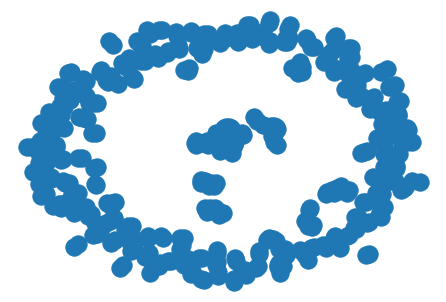

In [39]:
import networkx as nx
graph = nx.from_pandas_edgelist(vis_df, 'SrcIP', 'DstIP', edge_attr='Communication_Count')

nx.draw_spring(graph)

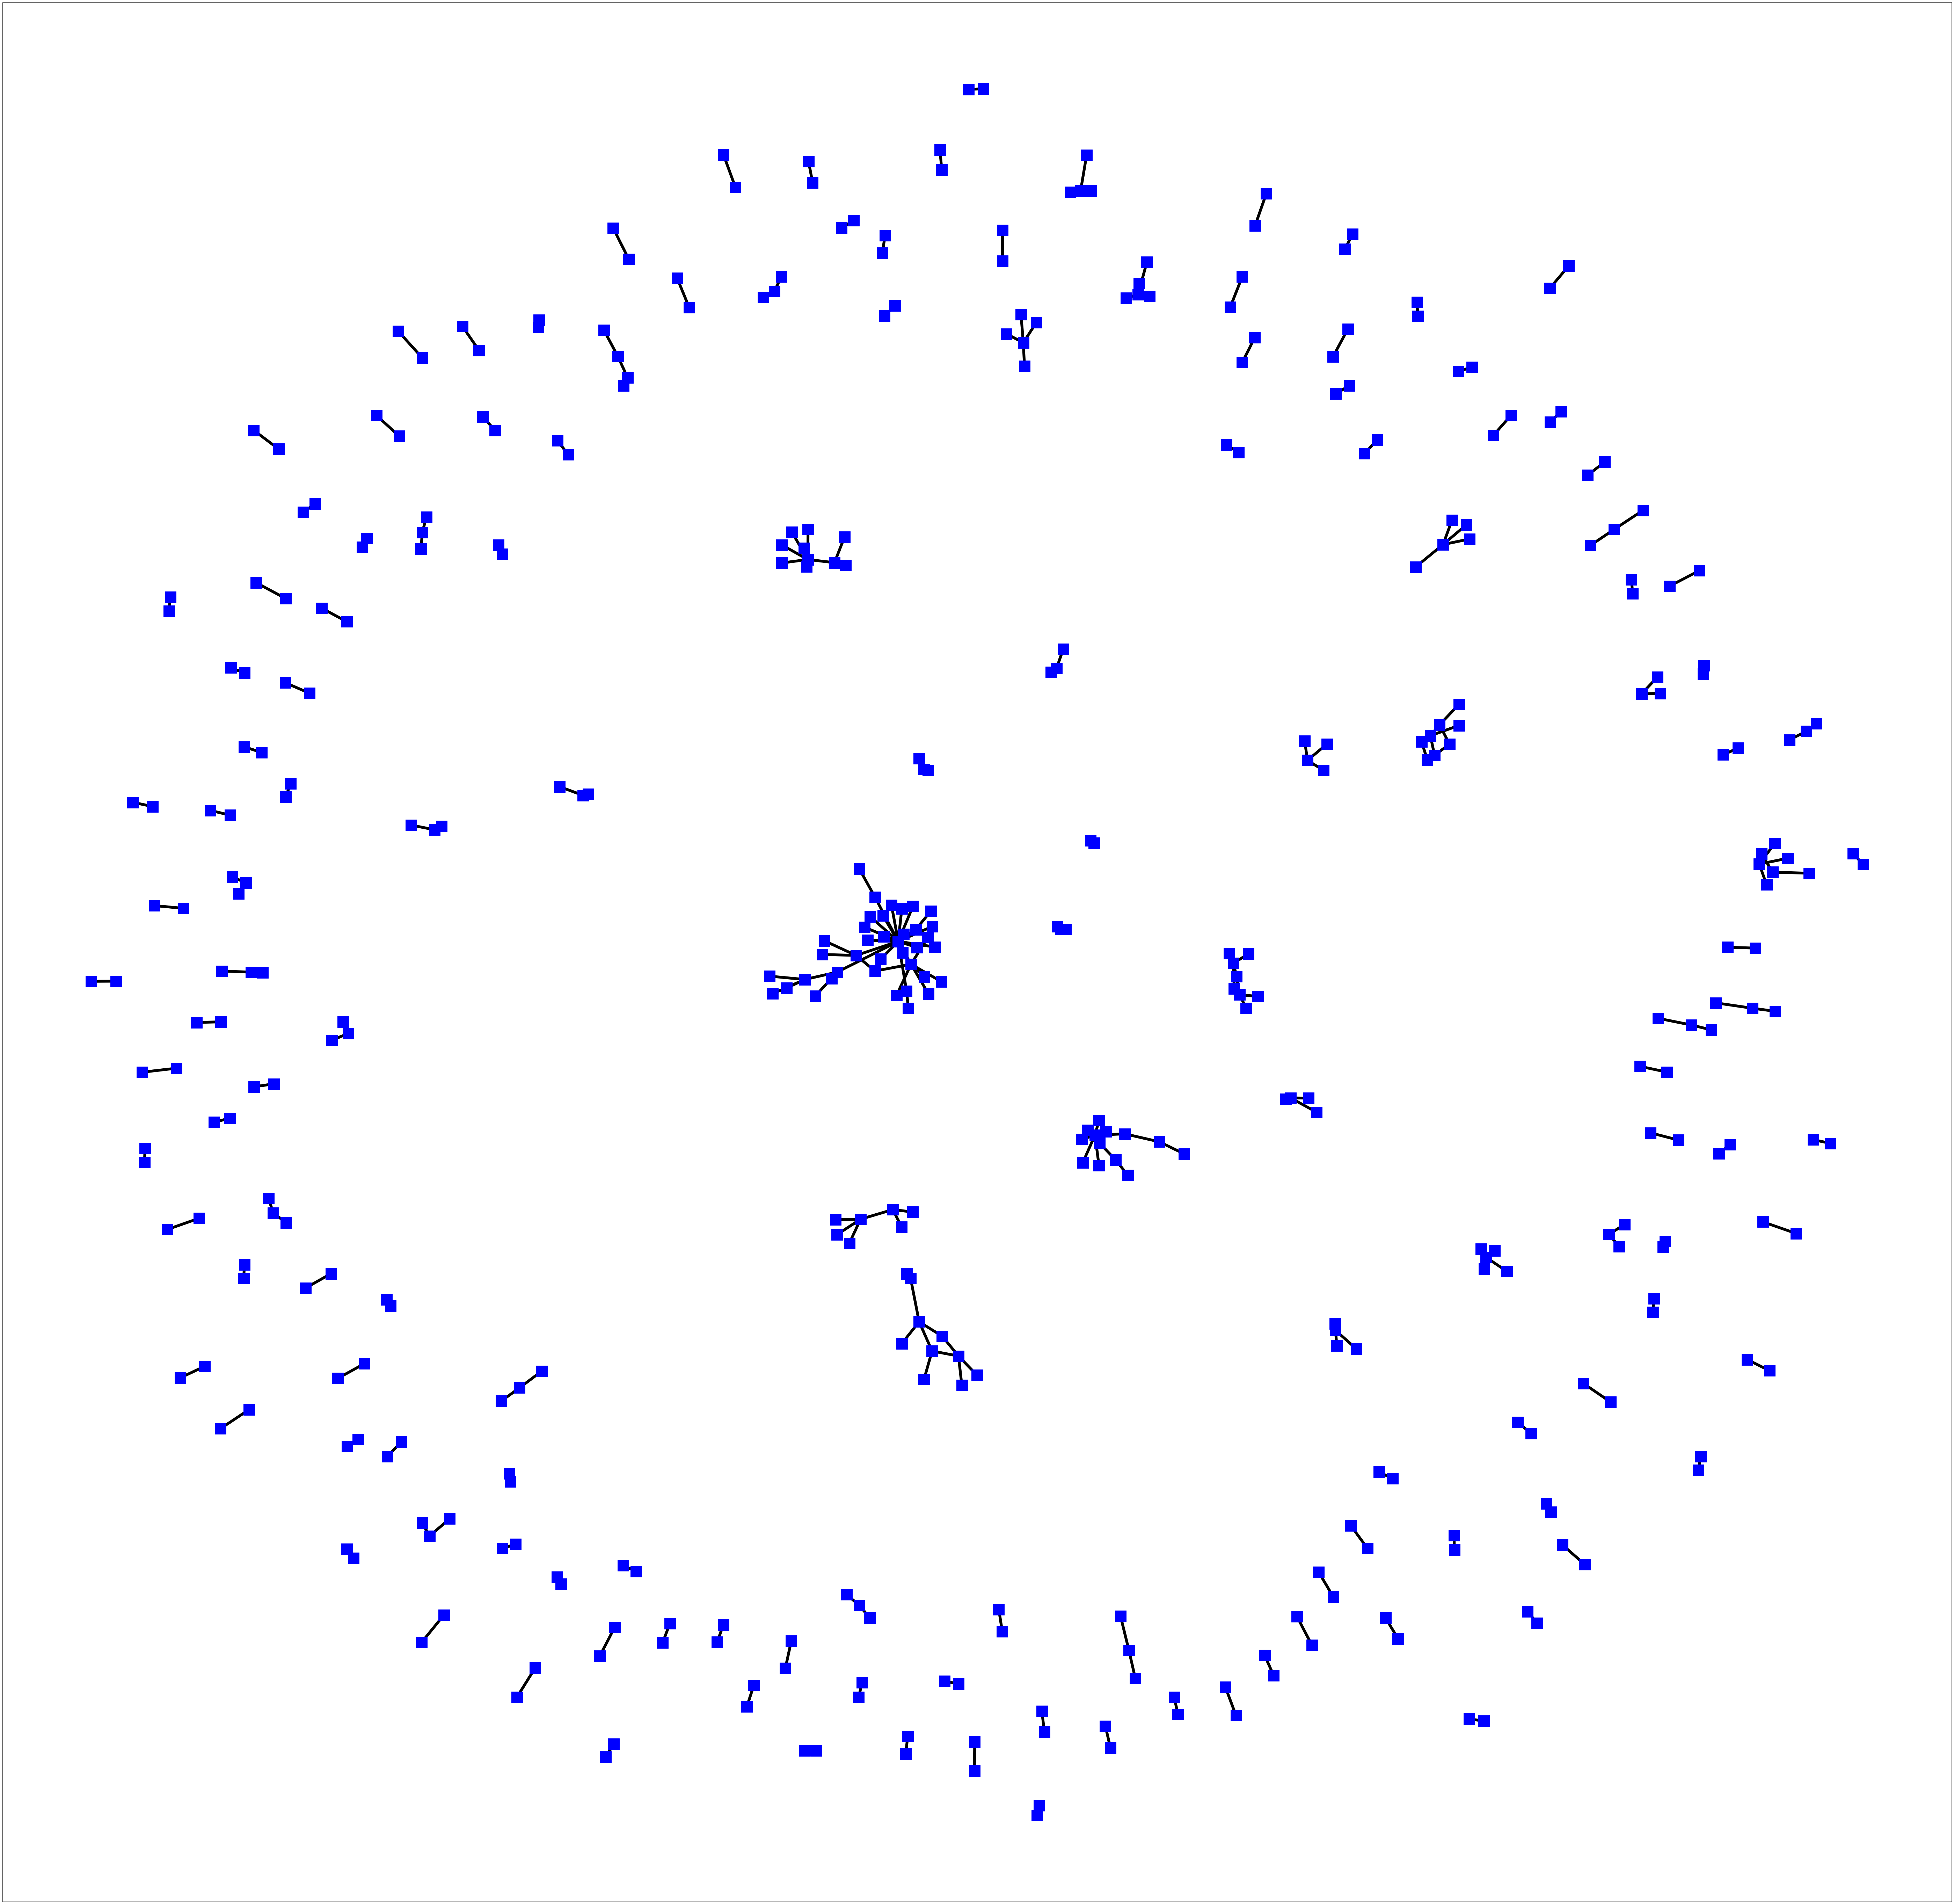

In [40]:
import matplotlib.pyplot as plt

communication_count = vis_df['Communication_Count'].tolist()
# print(communication_count)

plt.figure(figsize=(100,100))
positions = nx.spring_layout(graph, weight="Communication_Count")
nodes = nx.draw_networkx_nodes(graph, positions, node_size=1000, node_color='b', node_shape='s')

edges = nx.draw_networkx_edges(graph, positions, width=8)

plt.show()